Да се најдат податоците за цената на акциите и ESG score на компанијата Nike за изминатите 4 години. Потоа, да се проучат податоците со користење на tsfresh и истите да се објаснат. Да се направи benchmark на најмалку 3 модели за предикција на цена на акциите на компанијата имајќи ги предвид горенаведените податоци.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 6.5 MB/s eta 0:00:00


In [3]:
import pandas as pd

stock_data = pd.read_csv('/content/drive/MyDrive/NKE (1).csv')

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data['Close'] = stock_data['Close'].interpolate()

print(stock_data.head())

        Date       Open       High        Low      Close  Adj Close    Volume
0 2018-01-02  62.849998  63.490002  62.849998  63.490002  60.058411   6511000
1 2018-01-03  63.480000  63.660000  62.759998  63.480000  60.048954   6091100
2 2018-01-04  63.400002  63.549999  62.549999  63.439999  60.011108   5780500
3 2018-01-05  63.700001  64.300003  63.470001  63.980000  60.521915  11632300
4 2018-01-08  64.150002  64.709999  63.980000  64.550003  61.061119  11905700


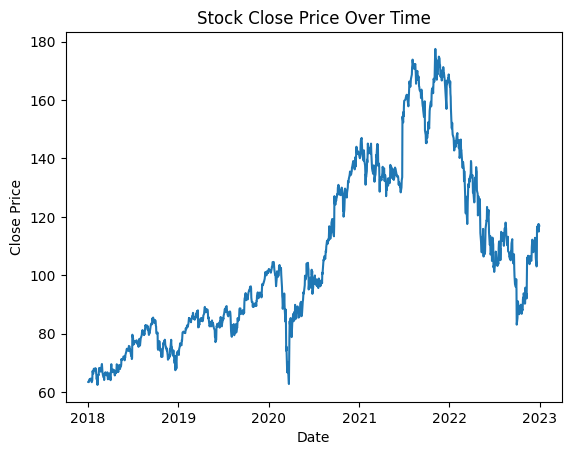

In [6]:
import matplotlib.pyplot as plt

plt.plot(stock_data['Date'], stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')
plt.show()


In [5]:
from tsfresh import extract_features

stock_features = extract_features(
    stock_data,
    column_id="Date",
    column_sort="Date",
    column_value="Close"
)

print(stock_features.head())

Feature Extraction: 100%|██████████| 1259/1259 [00:47<00:00, 26.59it/s]


            Close__variance_larger_than_standard_deviation  \
2018-01-02                                             0.0   
2018-01-03                                             0.0   
2018-01-04                                             0.0   
2018-01-05                                             0.0   
2018-01-08                                             0.0   

            Close__has_duplicate_max  Close__has_duplicate_min  \
2018-01-02                       0.0                       0.0   
2018-01-03                       0.0                       0.0   
2018-01-04                       0.0                       0.0   
2018-01-05                       0.0                       0.0   
2018-01-08                       0.0                       0.0   

            Close__has_duplicate  Close__sum_values  Close__abs_energy  \
2018-01-02                   0.0          63.490002        4030.980354   
2018-01-03                   0.0          63.480000        4029.710400   
2018-01-

In [8]:
from tsfresh import extract_features
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

stock_features = extract_features(stock_data, column_id="Date", column_sort="Date", column_value="Close")

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(stock_features)

y = stock_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X_train_imputed, y, test_size=0.2, random_state=42)



Feature Extraction: 100%|██████████| 1259/1259 [00:49<00:00, 25.37it/s]


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = stock_features
y = stock_data['Close']

imputer = SimpleImputer(strategy='mean')


X_train_imputed = imputer.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_imputed, y_train)

X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 1.6109791844780078e-27


In [10]:
print("X_train_imputed shape:", X_train_imputed.shape)
print("y_train shape:", y_train.shape)

X_train_imputed shape: (1007, 218)
y_train shape: (1007,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Изберете модели за бенчмаркинг
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


for model_name, model_instance in models.items():
    print(f"Training {model_name}...")

    model_instance.fit(X_train_imputed, y_train)

    y_pred = model_instance.predict(X_test_imputed)

    mse = mean_squared_error(y_test, y_pred)

    print(f"{model_name} - Mean Squared Error: {mse}")
    print("="*50)


Training Linear Regression...
Linear Regression - Mean Squared Error: 1.6109791844780078e-27
Training Random Forest...
Random Forest - Mean Squared Error: 0.00783340426127598
Training Gradient Boosting...
Gradient Boosting - Mean Squared Error: 0.05961020137732677


In [13]:
import numpy as np

nan_indices_x = np.where(np.isnan(X_train_imputed))
print("Indices with NaN values in X_train_imputed:", nan_indices_x)


nan_indices_y = np.where(np.isnan(y_train))
print("Indices with NaN values in y_train:", nan_indices_y)

# Функцијата np.array_equal се користи за споредба на две низи за еднаквост. Ако низите имаат исти вредности на истите позиции, функцијата враќа True, во спротивно, враќа False.
matching_indices = np.array_equal(nan_indices_x, nan_indices_y)
print("Matching indices between X_train_imputed and y_train:", matching_indices)

Indices with NaN values in X_train_imputed: (array([], dtype=int64), array([], dtype=int64))
Indices with NaN values in y_train: (array([], dtype=int64),)
Matching indices between X_train_imputed and y_train: False
